In [11]:
import numpy as np
import pandas as pd 
import scanpy as sc
import utils
import mrf
import os 
import random 
import imp
import mrf
import time

In [2]:
imp.reload(mrf)

<module 'mrf' from '/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py'>

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))
import seaborn as sns

In [4]:
adata = sc.read_visium('../../dataset/goldStandard')
adata.var_names_make_unique()
adata = utils.data_preprocess(adata)

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)

In [109]:
coord = np.array(adata.obs.iloc[:,1:3])
target_list =['CAMK2N1', 'PCP4', 'NEFM', 'NEFH', 'B3GALT2']
target_gene =target_list[2]

In [111]:
beta =5
labels_list= mrf.mrf_process(adata, gene_id=target_gene, beta = beta,max_iteration=5e4)

77 121


 12%|█▏        | 5806/50000 [00:00<00:01, 29996.81it/s]

100%|██████████| 50000/50000 [00:01<00:00, 41214.60it/s]

2653 pixels changed after 50000 iterations


In [112]:
exp = adata[:,target_gene].X.toarray()
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(exp)
gmm_labels = gmm.predict(exp)

In [113]:
from datetime import date
today = date.today()
today = today.strftime("%m_%d")
today

'10_17'

In [114]:
def label_reverse(labels_list):
    labels_list = np.array(labels_list)
    labels_list[labels_list==0]=2
    labels_list[labels_list==1]=0
    labels_list[labels_list==2]=1
    return labels_list

In [115]:
labels_list = label_reverse(labels_list)

In [116]:
output_dir = '../output/{}/'.format(today)
os.path.exists(output_dir) or os.makedirs(output_dir)

True

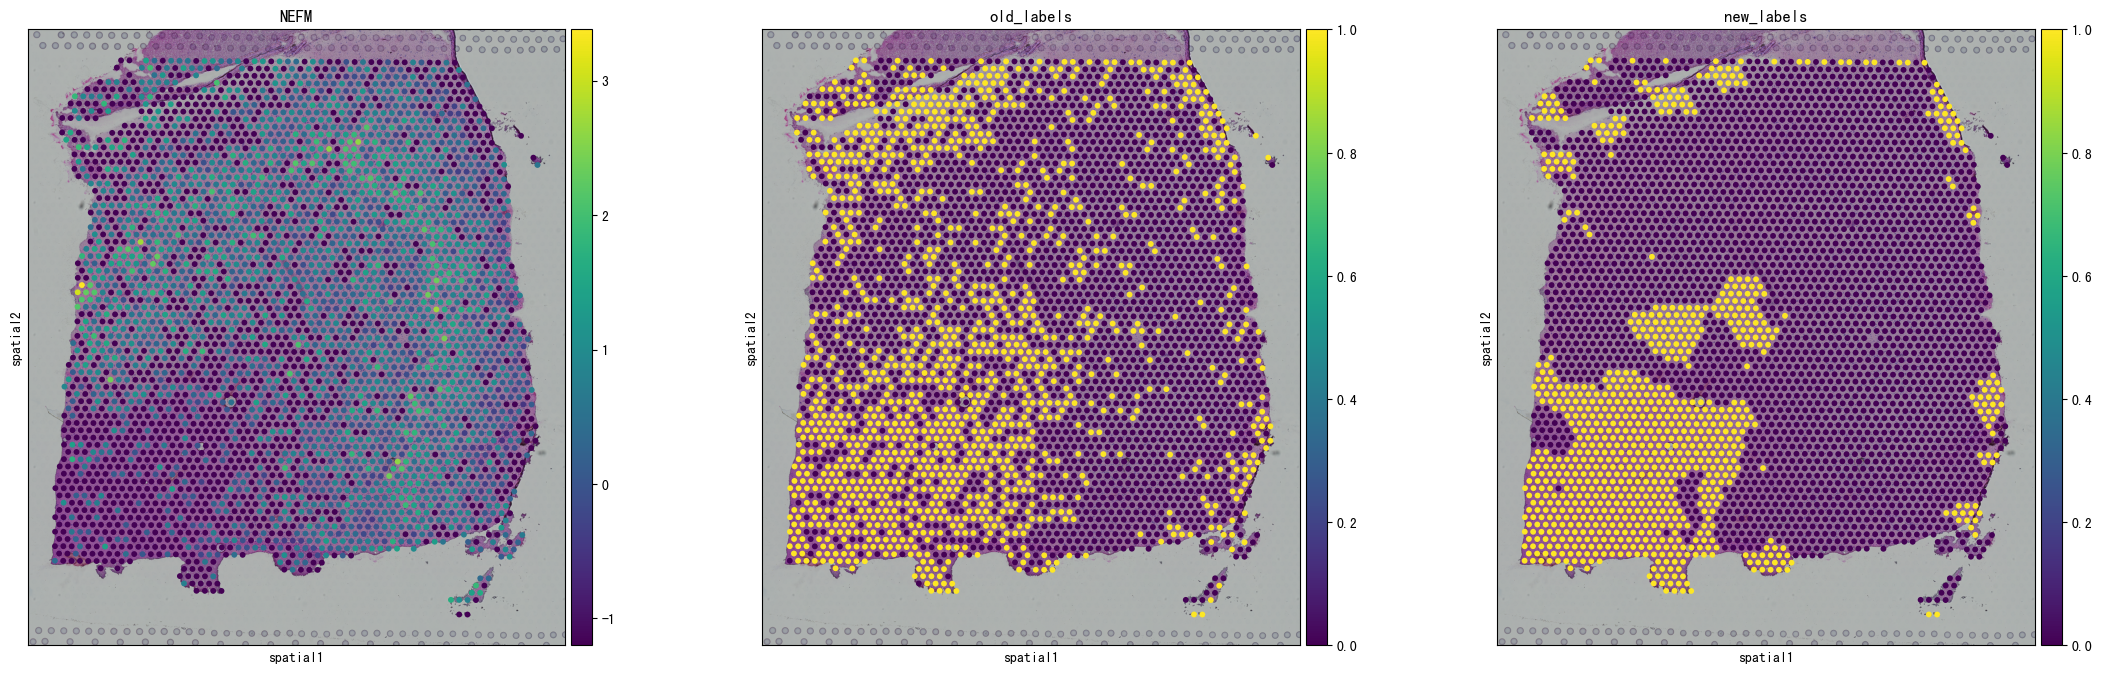

In [117]:
adata.obs['old_labels'] = gmm_labels
adata.obs['new_labels'] = labels_list
sc.pl.spatial(adata, color=[target_gene,'old_labels','new_labels'])